In [30]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats
import lux 
import plotly.express as px

In [2]:
df18 = pd.read_csv('data/merged/ces3_dp3_ces2')

In [4]:
df18.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
df18.head(2)

/Users/jaclynhenn/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/formatters.py:345: UserWarning:
Lux defaults to Pandas when there are no valid actions defined.


,total_population,california_county,sb_535_disadvantaged,ozone,pm2_5,diesel_pm,drinking_water,pesticides,tox_release,traffic,cleanup_sites,groundwater_threats,haz_waste,imp_water_bodies,solid_waste,pollution_burden_score,lbw,education,linguistic_isolation,unemployment,housing_burden,Pop. Char. Score,less_10_yrs,yrs_11_64,greater_65,hispanic,white,african_american,native_american,asian_american,other,prev_ozone,prev_pm2_5,prev_diesel_pm,prev_drinking_water,prev_pesticides,prev_tox_release,prev_traffic,prev_cleanup_sites,prev_groundwater_threats,prev_haz_waste,prev_imp_water_bodies,prev_solid_waste,prev_pollution_burden_score,prev_lbw
0,3174,Fresno,Yes,0.065,15.40,48.524,681.20,2.75,18551.957190,909.14,80.5,45.75,0.795,0,21.75,9.85,7.44,53.3,16.2,17.6,26.0,9.55,18.8,73.6,7.6,65.3,4.2,24.6,0.5,3.5,1.8,0.255228,14.746087,44.23,519.882370,5.470140,96414.458370,1217.535680,85.5,55.75,0.520,0,5.0,9.530973,0.058025
1,6133,San Bernardino,Yes,0.062,13.31,38.556,904.66,1.37,7494.236622,782.26,66.2,36.00,1.250,5,12.00,10.00,7.04,53.3,33.4,12.3,34.1,9.07,19.7,76.1,4.2,91.1,5.8,0.7,0.3,1.4,0.7,0.465401,13.888224,47.08,604.311803,1.363343,8122.687693,1232.874128,56.2,49.00,1.845,5,2.0,9.795127,0.063895


## Multicollinearity

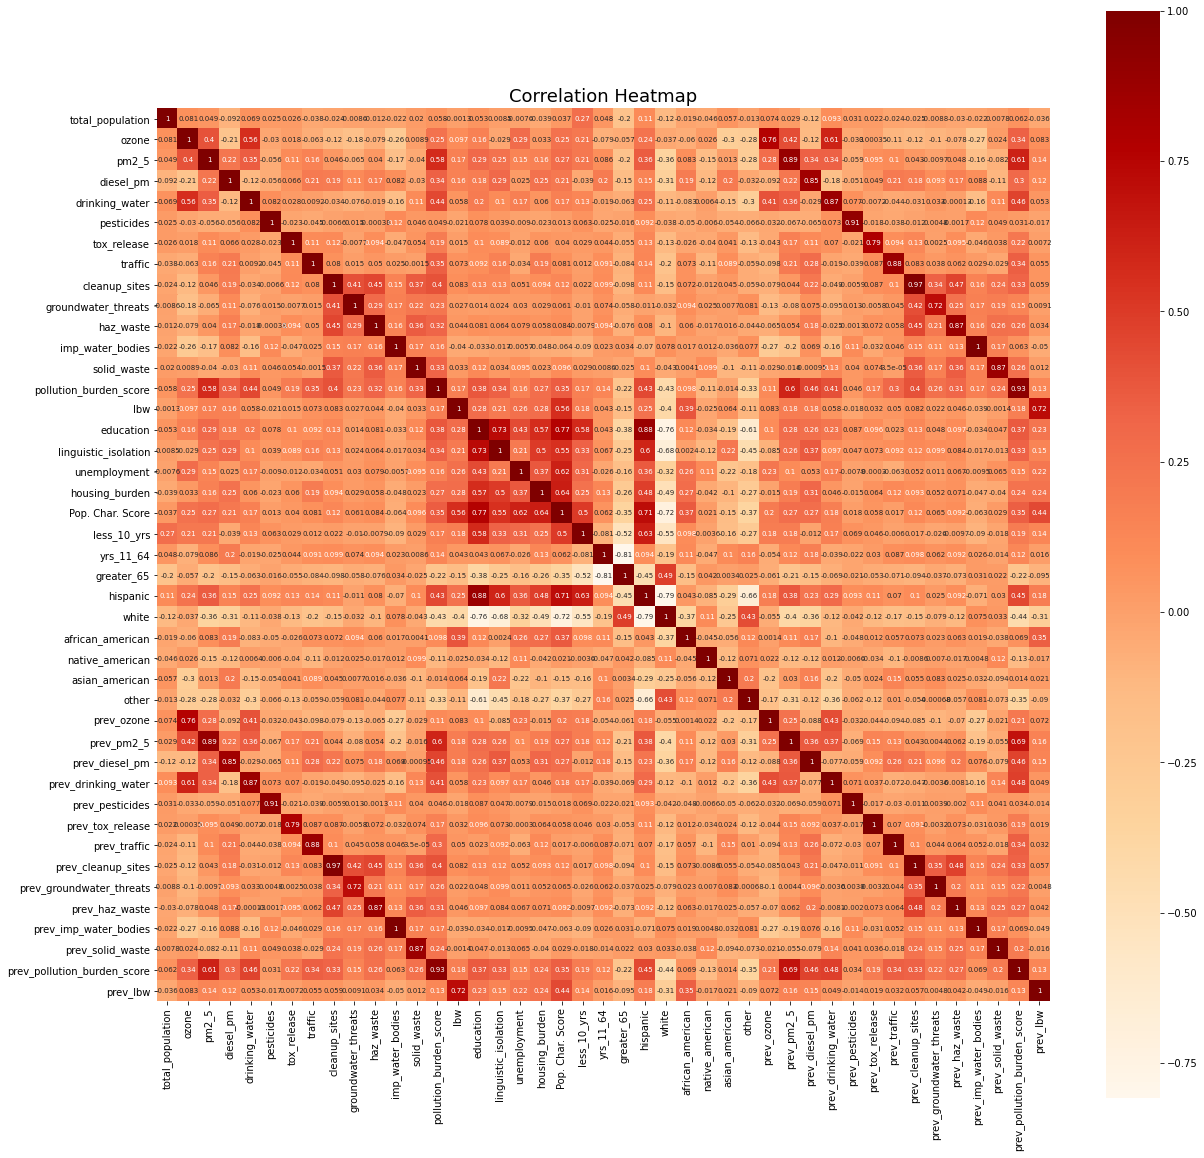

In [7]:
plt.figure(figsize = (20,20))
sns.heatmap(df18.corr(), cmap = 'OrRd', annot = True, annot_kws={"size":7}, square = True)
plt.title('Correlation Heatmap', fontsize = 18);

In [8]:
df18.drop(columns = ['prev_pesticides', 'prev_cleanup_sites', 'prev_pollution_burden_score'], 
         axis = 1, inplace = True)

## Columns

### TOTAL POPULATION

In [11]:
df18['total_population'].describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [12]:
df18[df18['total_population'] == 0]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [14]:
df18.drop([7930, 7936, 7940, 7942, 7944, 7945, 7949, 7952, 7960, 7961, 7977], inplace = True)


In [16]:
len(df18[df18['total_population'] == 0])

0

### CALIFORNIA COUNTY

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

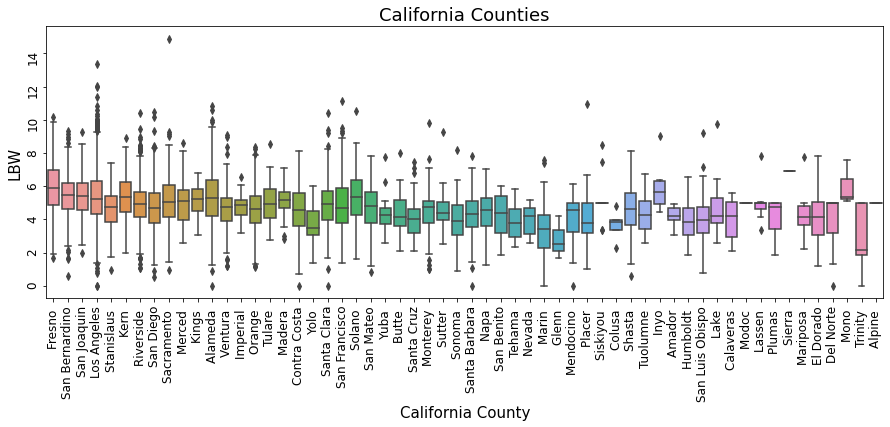

In [20]:
#Create boxplot to look to see if difference
f, axes = plt.subplots(1, figsize=(15,5))
bx = sns.boxplot(x=df18['california_county'],y=df18['lbw'])
bx.axes.set_title("California Counties",fontsize=18)
bx.set_xlabel("California County",fontsize=15)
bx.set_ylabel("LBW",fontsize=15)
bx.tick_params(labelsize=12, rotation = 90)

### SB 535 DISADVANTAGED COMMUNITY

SB 535 requires CalEPA
to identify disadvantaged communities based on
geographic, socioeconomic, public health and
environmental hazard criteria.

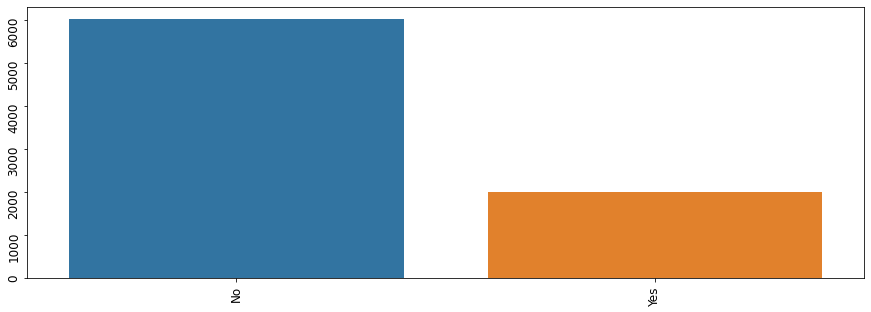

In [22]:
f, axes = plt.subplots(1, figsize=(15,5))
dc = sns.barplot(x=df18['sb_535_disadvantaged'].value_counts().index ,y=df18['sb_535_disadvantaged'].value_counts().values)
dc.tick_params(labelsize=12, rotation = 90)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

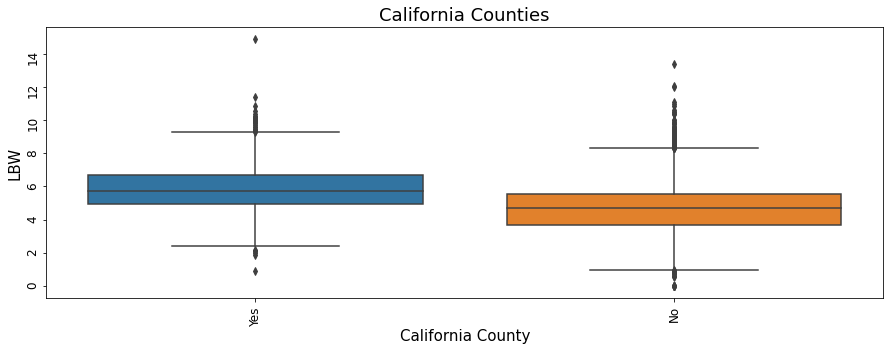

In [23]:
#Create boxplot to look to see if difference
f, axes = plt.subplots(1, figsize=(15,5))
bx = sns.boxplot(x=df18['sb_535_disadvantaged'],y=df18['lbw'])
bx.axes.set_title("California Counties",fontsize=18)
bx.set_xlabel("California County",fontsize=15)
bx.set_ylabel("LBW",fontsize=15)
bx.tick_params(labelsize=12, rotation = 90)

In [25]:
disadvantage_y = df18[df18['sb_535_disadvantaged'] == 'Yes']['lbw']
disadvantage_n = df18[df18['sb_535_disadvantaged'] == 'No']['lbw']

stats.ttest_ind(disadvantage_y, disadvantage_n)

Ttest_indResult(statistic=31.964300394306264, pvalue=3.917726552667787e-211)

### OZONE

In [31]:
df18['ozone'].describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [33]:
ozone_lhalf = df18[df18['ozone'] <= 0.047431]['lbw']
ozone_uhalf = df18[df18['ozone'] > 0.047431]['lbw']

stats.ttest_ind(ozone_lhalf, ozone_uhalf)

Ttest_indResult(statistic=-0.6867864586461339, pvalue=0.4922371559939064)

## PM 2.5

In [35]:
df18['pm2_5'].describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

**NOTES:** Statistical difference between below mean and above mean. When break up into four groups, no statistical difference between 1 and 2. Combined 1 and 2 to one group, statistical difference between all 3 

In [52]:
#difference between all
pm_1 = df18[df18['pm2_5']  <= 10.370000]['lbw']
pm_2 = df18[(df18['pm2_5'] > 10.370000) & (df18['pm2_5'] <= 12.050000)]['lbw']
pm_3 = df18[df18['pm2_5'] > 12.050000]['lbw']

In [53]:
stats.ttest_ind(pm_1, pm_3)

Ttest_indResult(statistic=-14.641766636238076, pvalue=1.1129627338453916e-47)

In [54]:
conditions = [(df18['pm2_5']  <= 10.370000),
             ((df18['pm2_5'] > 10.370000) & (df18['pm2_5'] <= 12.050000)), 
             (df18['pm2_5'] > 12.050000)]

choice = [('bottom'), ('middle'), ('top')]

df18['pm_breakdown'] = np.select(conditions, choice)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

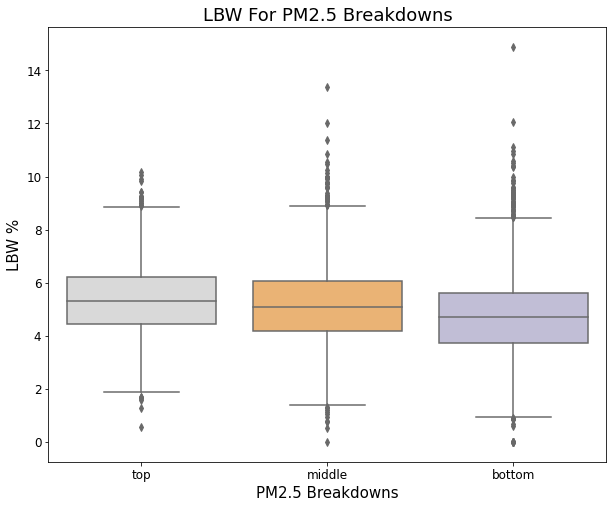

In [55]:
f, axes = plt.subplots(1, figsize=(10,8))
bx = sns.boxplot(x=df18['pm_breakdown'],y=df18['lbw'], palette = 'Set3_r')
bx.axes.set_title("LBW For PM2.5 Breakdowns",fontsize=18)
bx.set_xlabel("PM2.5 Breakdowns",fontsize=15)
bx.set_ylabel("LBW %",fontsize=15)
bx.tick_params(labelsize=12)

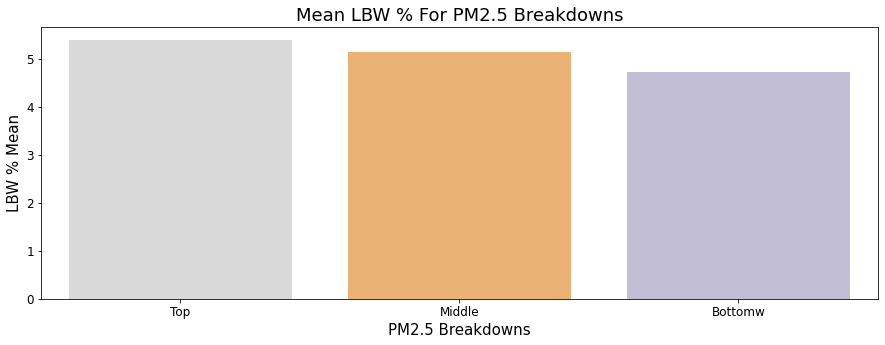

In [57]:
x = ['Top', 'Middle', 'Bottomw']
y = [pm_3.mean(), pm_2.mean(), pm_1.mean()]

#Create boxplot to look to see if difference
f, axes = plt.subplots(1, figsize=(15,5))
bx = sns.barplot(x=x,y=y, palette = 'Set3_r')
bx.axes.set_title("Mean LBW % For PM2.5 Breakdowns",fontsize=18)
bx.set_xlabel("PM2.5 Breakdowns",fontsize=15)
bx.set_ylabel("LBW % Mean",fontsize=15)
bx.tick_params(labelsize=12)

In [60]:
df18.intent = ['lbw', 'pm2_5']
df18

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [64]:
graph = df18.exported
pm2_5_graph = graph[0]

In [67]:
pm2_5_graph

LuxWidget(current_vis={'config': {'view': {'continuousWidth': 400, 'continuousHeight': 300}, 'axis': {'labelCo…

<Vis  (x: lbw, y: pm2_5, color: sb_535_disadvantaged) mark: heatmap, score: 0.5 >

### DRINKING WATER

In [84]:
df18['drinking_water'].describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [85]:
#difference between all
dw_1 = df18[df18['drinking_water']  <= 472.372294]['lbw']
dw_2 = df18[df18['drinking_water'] > 472.372294]['lbw']

In [86]:
stats.ttest_ind(dw_1, dw_2)

Ttest_indResult(statistic=-5.462111491572226, pvalue=4.845922954646674e-08)

In [87]:
conditions = [(df18['drinking_water']  <= 472.372294), 
             (df18['drinking_water'] > 472.372294)]

choices = [('Bottom'), ('Top')]

df18['dw_breakdown'] = np.select(conditions, choices)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

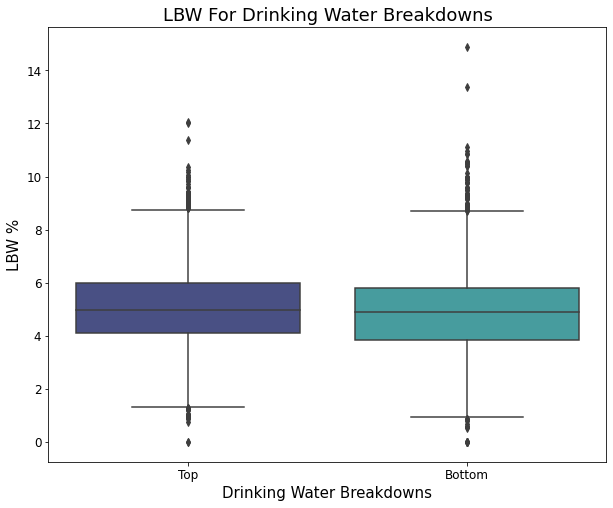

In [88]:
f, axes = plt.subplots(1, figsize=(10,8))
bx = sns.boxplot(x=df18['dw_breakdown'],y=df18['lbw'], palette = 'mako')
bx.axes.set_title("LBW For Drinking Water Breakdowns",fontsize=18)
bx.set_xlabel("Drinking Water Breakdowns",fontsize=15)
bx.set_ylabel("LBW %",fontsize=15)
bx.tick_params(labelsize=12)

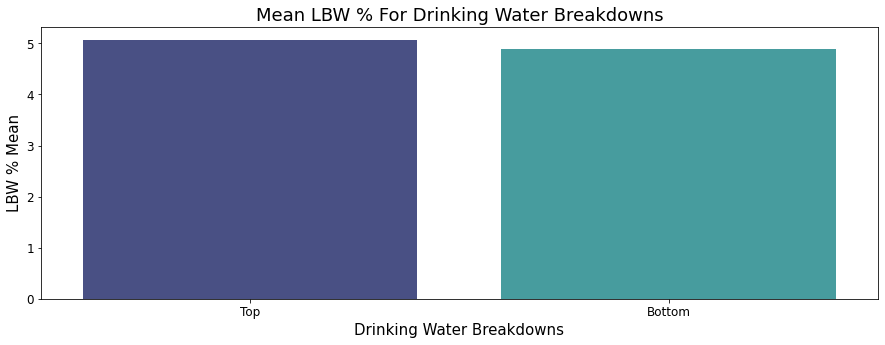

In [91]:
x = ['Top', 'Bottom']
y = [dw_2.mean(), dw_1.mean()]

#Create boxplot to look to see if difference
f, axes = plt.subplots(1, figsize=(15,5))
bx = sns.barplot(x=x,y=y, palette = 'mako')
bx.axes.set_title("Mean LBW % For Drinking Water Breakdowns",fontsize=18)
bx.set_xlabel("Drinking Water Breakdowns",fontsize=15)
bx.set_ylabel("LBW % Mean",fontsize=15)
bx.tick_params(labelsize=12)

In [93]:
df18.to_csv('data/cleaned/df18_eda')

In [ ]:
x = list(df18.groupby('california_county')['lbw'].mean().index)
y1 = list(df18.groupby('california_county')['lbw'].mean().values)
y2 = list(df18.groupby('california_county')['prev_lbw'].mean().values)

fig, ax = plt.subplots(1, figsize=(15,5))
d_3 = ax.plot(x, y1)
d_2 = ax.plot(x, y2)
ax.set_title("CES 2.0 & CES 3.0 Average Low Birth Weight For California County",fontsize=18)
ax.set_xlabel("California County",fontsize=15)
ax.set_ylabel("Average LBW",fontsize=15)
ax.tick_params(labelsize=12, rotation = 90)

#create proxy artist legent
blue_line = mlines.Line2D([], [], color='blue', label='CES 3.0')
orange_line = mlines.Line2D([], [], color='orange', label='CES 2.0')
ax.legend(handles=[blue_line, orange_line])